
# Nettoyage et analyse des données

*OPENCLASSROOMS - Parcours Data Analyst V2 - Adeline Le Ray*
<hr>

## Sommaire

* [Nettoyage des données](#nettoyage)
    * [Type des variables](#type)
    * [Valeurs manquantes](#manquante)
    * [Recherche des doublons](#doublon)
    * [Identifications des outliers](#outliers)
        * [Méthode de l'écart interquartile](#interquartile)
        * [Méthode du Z-score](#z-score)
   
    

## Nettoyage des données<a class="anchor" id="nettoyage"></a>

### Type des variables<a class="anchor" id="type"></a>

```
#Types de variables du df
df.dtypes

#Traitement des dates
df['date']=pd.to_datetime(df['date'])
```

### Valeurs manquantes<a class="anchor" id="manquante"></a>

```
# Nombre de valeurs "NaN"
df.isna().sum()
df.isnull().sum()

# Pourcentage de valeurs "NaN"
df.isna().mean()
df.isnull().mean()

#Valeurs manquantes uniquement
nb_na=df.isna().sum()
nb_na.loc[nb_na>0]
```

### Recherche des doublons<a class="anchor" id="doublon"></a>

```
#Nombre de doublons
df.duplicated().sum()

# Recherche des doublons
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

# Suppression des doublons
operations.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)
```

### Identification des outliers<a class="anchor" id="outliers"></a>

#### Méthode de l'écart interquartile<a class="anchor" id="interquartile"></a>


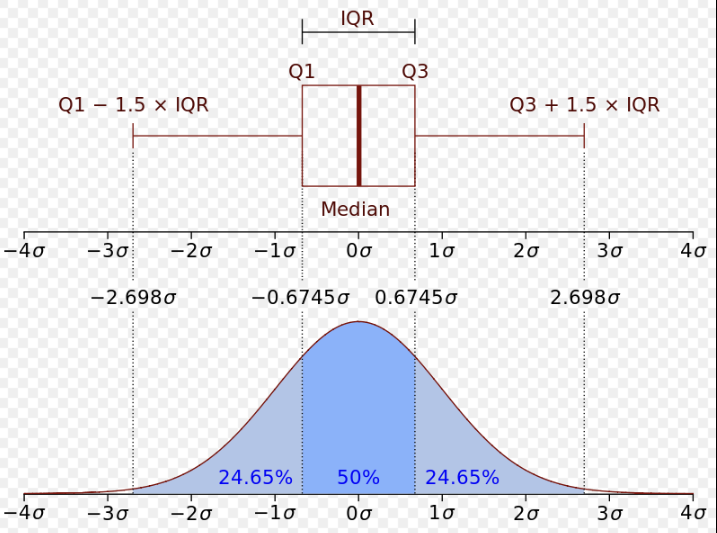


Les valeurs au-dessus ou au-desssous des limites basses et haute, $Q3-1.5xIQR$ et $Q3+1.5xIQR$, sont considérés comme des outliers.

##### Code 
```
#Tri de la série 'price' : fonction sorted()
price = sorted(price)

# Calcul de l'écart interquartile
q1, q3= np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))

# Calcul des valeurs limites
lower_bound = round(q1 -(1.5 * iqr),2)
upper_bound = round(q3 +(1.5 * iqr),2)
print("")
print("Sont considérés comme outliers les prix en-dessous de la lower bound et ceux au-dessus de la upper bound :")
print("Lower_bound => " + str(lower_bound)+" euros")
print("Upper_bound => " + str(upper_bound)+" euros")
print("")

# Détermination des outliers
result = df_final[(df_final['price'] > upper_bound) | (df_final['price'] < lower_bound)]

# Affichage du résultat
print("")
print("Nombre d'outliers détectés => " + str(len(result)))
result['price']
```

##### Affichage sous forme de nuage de points
```
# Création de 2 data frames pour mettre en relief les outliers
only_ok = df_final[(df_final['price'] < upper_bound) & (df_final['price'] > lower_bound)]
only_outliers = df_final[(df_final['price'] > upper_bound) | (df_final['price'] < lower_bound)]

# Représentation graphique en nuage de points
plt.figure(figsize=(10,7))
line1=plt.scatter(only_ok['price'].index, only_ok['price'].values)
line2=plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='red')
plt.title("Outliers de la variable 'price'",fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Prix')
plt.legend([line1,line2],['Valeur price ok','Outliers price'])
plt.show(line1,line2)
```

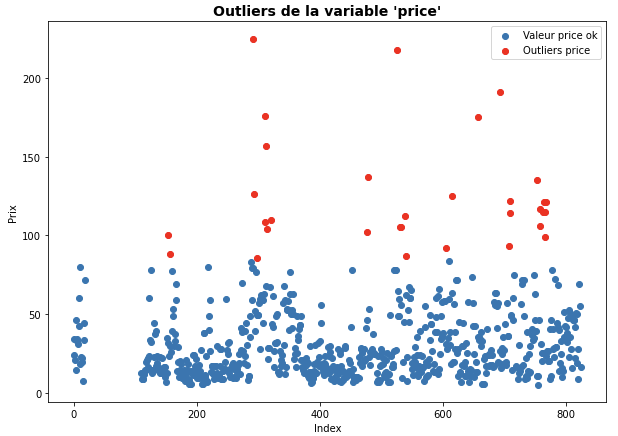

#### Méthode du Z-score<a class="anchor" id="z-score"></a>

L'équation du score z est la suivante :  $z = (x – μ)/σ$

avec :
- x : variable
- $μ$ = moyenne des x
- $σ$ = écart-type de la variable x

Pour la détection des outliers, il faut définir un seuil à partir duquel les valeurs sont considérées comme outliers, ce seuil est le 'threshold'. C'est le nombre d'écart-type d'écart par rapport à la moyenne.

Le threshold peut être de 2, 2.5 ou 3.

##### Code
```
# Création d'une fonction pour lister les prix considérés comme outliers
outliers=[] # création d'une liste vide
def detectOutlier(data):
    threshold=2
    mean = np.mean(data)# calcul de la moyenne
    std =np.std(data)#calcul de l'écart-type
   
    for i in data:
        z_score = (i - mean)/std#calcul du z-score
        if np.abs(z_score) > threshold: #valeur absolue du z-score
            outliers.append(i) # ajout de i dans la liste
    return outliers

#Application de la fonction à la série 'price'
priceOutliers = detectOutlier(price)

#affichage des outliers détectés
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))
print(priceOutliers)
```